In [42]:
import random

# Parameters
N = 100  # Total number of nodes
f = 33   # Number of faulty nodes
num_blocks = 3  # Number of blocks to vote on
assert N == 3 * f + 1

# Vote structures
votes = [i % num_blocks + 1 for i in range(N)]  # Initial votes, evenly distributed
vote_graph = [[] for _ in range(N)]  # Each element will be a list storing indices of votes seen

def count_votes(vote_indices):
    """Aggregate votes based on indices and return count."""
    vote_count = {}
    for index in vote_indices:
        vote = votes[index]
        if vote in vote_count:
            vote_count[vote] += 1
        else:
            vote_count[vote] = 1
    return vote_count

def simulate_voting_round():
    """Simulate a voting round with connected vote graphs and vote views."""
    global votes
    new_votes = []
    new_vote_graph = []
    for i in range(N):
        visible_indices = random.sample(range(N), N - f)  # Indices of votes visible to node i
        vote_count = count_votes(visible_indices)
        most_supported = max(vote_count, key=vote_count.get, default=votes[i])  # Use previous vote if tie
        new_votes.append(most_supported)
        new_vote_graph.append(visible_indices)
    votes = new_votes
    vote_graph = new_vote_graph

def consensus_reached():
    """Check if all nodes have the same vote."""
    return len(set(votes)) == 1

# Main simulation loop
round_count = 0
while not consensus_reached():
    simulate_voting_round()
    round_count += 1
    print(f"Round {round_count}: Votes -> {votes}")

print(f"Consensus reached in {round_count} rounds.")


Round 1: Votes -> [2, 2, 3, 1, 2, 3, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2, 3, 1, 3, 2, 3, 1, 3, 3, 2, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 2, 2, 1]
Round 2: Votes -> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Consensus reached in 2 rounds.


In [77]:
import random

# Parameters
N = 100  # Total number of nodes
f = 33   # Number of faulty nodes
num_blocks = 100  # Number of block candidates
heights = 5  # Number of heights to simulate
assert N == 3 * f + 1

# Initial votes, evenly distributed
current_votes = [i % num_blocks + 1 for i in range(N)]  # Initial votes, evenly distributed

# Each node's vote graph: a list of dictionaries for each height
node_vote_graphs = [[[0 for _ in range(num_blocks)] for _ in range(heights)] for _ in range(N)]

def update_node_vote_graph(node, height, received_votes):
    """Update a single node's vote graph with new votes at a given height from received data."""
    for block in range(1, num_blocks + 1):
        node_vote_graphs[node][height][block - 1] = received_votes.count(block)

def infer_and_update_vote_graphs(node, visible_indices, height):
    """Infer and update the node's vote graph based on other nodes' visible votes."""
    for i in visible_indices:
        for block in range(1, num_blocks + 1):
            # Add to the inferred vote counts based on visible data assuming it reflects their current state
            node_vote_graphs[node][height][block - 1] += node_vote_graphs[i][height][block - 1]

def calculate_VC_i(node, height):
    """Calculate the Vote Counter for a specific node up to the given height."""
    VC_i = [0] * num_blocks
    for h in range(height + 1):
        for block in range(num_blocks):
            VC_i[block] += node_vote_graphs[node][h][block]
    return VC_i

def simulate_voting_round(height):
    """Simulate a voting round where each node updates its vote based on its own VC."""
    global current_votes
    new_votes = []
    for node in range(N):
        visible_indices = random.sample(range(N), N - f)  # Each node sees votes from N-f other nodes
        visible_votes = [current_votes[i] for i in visible_indices]
        update_node_vote_graph(node, height, visible_votes)
        infer_and_update_vote_graphs(node, visible_indices, height)
        VC_i = calculate_VC_i(node, height)

        # Assume missing votes go to each block to calculate potentially supported
        potentially_supported = [VC_i[block] + (N - sum(visible_votes.count(b + 1) for b in range(num_blocks)))
                                  for block in range(num_blocks)]
        max_support = max(VC_i)
        candidates = [block + 1 for block, support in enumerate(potentially_supported) if support >= max_support]
        chosen_block = random.choice(candidates)
        new_votes.append(chosen_block)
    current_votes = new_votes

def consensus_reached(votes):
    """Check if all nodes have the same vote."""
    return len(set(votes)) == 1

print(f"Height {1}: Votes -> {current_votes}")

# Main simulation loop
for height in range(heights):
    simulate_voting_round(height)
    print(f"Height {height+2}: Votes -> {current_votes}")
    if consensus_reached(current_votes):
        print(f"Consensus reached at height {height+1}.")
        break
else:
    print("Consensus not reached within the simulated heights.")

Consensus reached at height 4.
Votes at each height: {0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 1: [90, 82, 21, 76, 69, 20, 73, 34, 74, 53, 58, 83, 77, 6, 29, 34, 31, 63, 89, 89, 94, 78, 39, 69, 43, 87, 60, 91, 74, 43, 5, 10, 31, 92, 78, 74, 64, 85, 17, 89, 44, 38, 28, 50, 44, 94, 100, 99, 69, 31, 80, 13, 99, 100, 30, 16, 57, 38, 55, 15, 84, 21, 94, 26, 73, 47, 53, 19, 62, 95, 85, 49, 5, 57, 50, 11, 6, 26, 52, 91, 32, 95, 93, 94, 80, 68, 74, 33, 49, 81, 49, 89, 96, 78, 68, 66, 78, 21, 64, 94], 2: [94, 94, 78, 94, 94, 74, 94, 78, 89, 89, 89, 94, 78, 89, 94, 74, 94, 74, 78, 21, 74, 74, 78, 78, 78, 94, 94, 31, 69, 49, 94, 78, 89, 78, 89, 74

In [82]:
import random

# Parameters
N = 100  # Total number of nodes
f = 33   # Number of faulty nodes
num_blocks = 100  # Number of block candidates
heights = 5  # Number of heights to simulate
assert N == 3 * f + 1

# Initialize structures to hold vote data for each node at each height
votes_at_height = {height: [] for height in range(heights)}
seen_votes_at_height = [{node: set() for node in range(N)} for height in range(heights)]

current_votes = [i % num_blocks + 1 for i in range(N)]  # Initial votes, evenly distributed

#current_votes = [random.randint(1, num_blocks) for _ in range(N)] # Initial votes, randomly distributed

def update_votes_and_visibility(node, height, visible_votes):
    """Updates the record of seen votes and the current votes at each height."""
    # Update current votes for the height
    votes_at_height[height].append(current_votes[node])

    # Record which votes this node has seen at this height
    for vote in visible_votes:
        seen_votes_at_height[height][node].add(vote)

def calculate_missing_votes(node, height):
    """Calculates the number of votes not seen by a node up to a given height."""
    total_seen = sum(len(seen_votes_at_height[h][node]) for h in range(height + 1))
    total_votes_up_to_height = (height + 1) * N
    return total_votes_up_to_height - total_seen

def simulate_voting_round(height):
    """Simulate a voting round where each node updates its vote based on its own VC and missing votes."""
    global current_votes
    new_votes = []
    for node in range(N):
        visible_indices = random.sample(range(N), N - f)  # Each node sees votes from N-f other nodes
        visible_votes = [current_votes[i] for i in visible_indices]

        update_votes_and_visibility(node, height, visible_votes)

        missing_votes = calculate_missing_votes(node, height)

        # Calculate potentially most supported blocks including missing votes
        vote_counts = [0] * num_blocks
        for v in visible_votes:
            vote_counts[v - 1] += 1

        potentially_supported = [count + missing_votes for count in vote_counts]
        max_support = max(potentially_supported)
        candidates = [i + 1 for i, count in enumerate(potentially_supported) if count == max_support]

        chosen_block = random.choice(candidates)
        new_votes.append(chosen_block)

    current_votes = new_votes

def consensus_reached():
    """Check if all nodes have the same vote."""
    return len(set(current_votes)) == 1

# Main simulation loop
print(f"Height {1}: Votes -> {current_votes}")

# Main simulation loop
for height in range(heights):
    simulate_voting_round(height)
    print(f"Height {height+2}: Votes -> {current_votes}")
    if consensus_reached():
        print(f"Consensus reached at height {height+2}.")
        break
    print("Consensus not reached within the simulated heights.")


Height 1: Votes -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Height 2: Votes -> [47, 91, 73, 31, 33, 39, 30, 12, 25, 29, 100, 27, 51, 96, 82, 43, 80, 10, 1, 21, 21, 74, 82, 38, 22, 53, 62, 40, 78, 72, 31, 95, 39, 46, 6, 16, 86, 77, 100, 84, 58, 65, 60, 27, 13, 15, 45, 25, 17, 53, 10, 65, 59, 9, 21, 15, 71, 41, 98, 52, 3, 74, 19, 63, 46, 17, 46, 74, 62, 75, 79, 18, 38, 56, 65, 68, 60, 46, 71, 30, 54, 48, 64, 80, 70, 23, 25, 80, 54, 20, 91, 76, 66, 30, 99, 65, 99, 21, 74, 79]
Consensus not reached within the simulated heights.
Height 3: Votes -> [21, 21, 21, 74, 46, 46, 25, 21, 21, 74, 30, 46, 46, 46, 74, 25, 80, 46, 46, 46, 65, 21, 65, 65, 74

In [139]:
import random

# Parameters
N = 100  # Total number of nodes
f = 33   # Number of faulty nodes
num_blocks = 3  # Number of block candidates
heights = 1000  # Number of heights to simulate
assert N == 3 * f + 1

# Initialize structures to hold vote data and observed votes
votes_at_height = [[[] for _ in range(N)] for _ in range(heights)]
observed_votes = [[set() for _ in range(N)] for _ in range(heights)]

#current_votes = [i % num_blocks + 1 for i in range(N)]  # Initial votes, evenly distributed

current_votes = [random.randint(1, num_blocks) for _ in range(N)] # Initial votes, randomly distributed

def update_observed_votes(node, height, visible_votes):
    """Updates the record of seen votes at a particular height."""
    observed_votes[height][node].update(visible_votes)

def get_missing_votes(node, height):
    """Calculates the number of votes not seen by a node up to a given height."""
    seen_count = sum(len(observed_votes[h][node]) for h in range(height))
    expected_count = height * N
    return expected_count - seen_count

def calculate_VC_i(height):
    """Calculate the Vote Counter for each node at a given height."""
    VC = [{block: 0 for block in range(1, num_blocks + 1)} for _ in range(N)]
    for node in range(N):
        for h in range(height):
            for vote in votes_at_height[h][node]:
                VC[node][vote] += 1
    return VC

def simulate_voting_round(height):
    """Simulate a voting round where each node updates its vote based on observed and potentially supported votes."""
    global current_votes
    new_votes = []
    VC = calculate_VC_i(height)

    for node in range(N):
        visible_indices = random.sample(range(N), N - f)
        visible_votes = [current_votes[i] for i in visible_indices]

        update_observed_votes(node, height, visible_votes)
        votes_at_height[height][node] = visible_votes
        missing_votes = get_missing_votes(node, height)

        # Calculate potentially most supported considering observed and missing votes
        vote_counts = {block: VC[node][block] for block in range(1, num_blocks + 1)}
        for block in vote_counts:
            vote_counts[block] += missing_votes

        max_support = max(vote_counts.values())
        candidates = [block for block, count in vote_counts.items() if count == max_support]

        chosen_block = random.choice(candidates)
        new_votes.append(chosen_block)

    current_votes = new_votes

def alignment_reached():
    """Check if all nodes have the same vote."""
    return len(set(current_votes)) == 1

# Main simulation loop
print(f"Height {1}: Votes -> {current_votes}")

# Main simulation loop
for height in range(heights):
    simulate_voting_round(height)
    print(f"Height {height+2}: Votes -> {current_votes}")
    if alignment_reached():
        print(f"Branch alignment reached at height {height+2}.")
        break

Height 1: Votes -> [3, 1, 3, 3, 2, 3, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 3, 3, 2, 3, 1, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 2, 1, 3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 3, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 1, 2, 3]
Height 2: Votes -> [1, 2, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 3, 1, 1, 2, 1, 2, 3, 2, 3, 3, 1, 1, 2, 3, 2, 2, 3, 1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 3, 2, 2, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3, 1, 2, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 1, 3, 3, 2]
Height 3: Votes -> [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2]
Height 4: Votes -> [1, 1, 3, 1, 2, 1, 1,

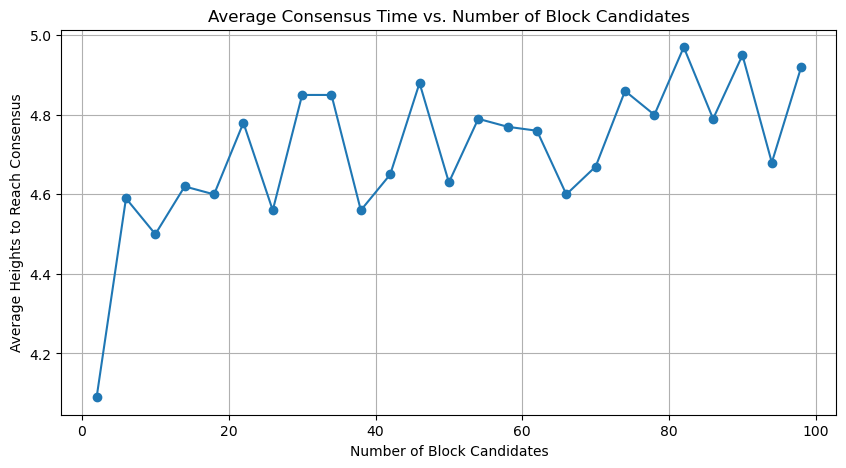

In [113]:
import random
import matplotlib.pyplot as plt

def update_observed_votes(node, height, visible_votes, observed_votes):
    """Updates the record of seen votes at a particular height."""
    observed_votes[height][node].update(visible_votes)

def get_missing_votes(node, height, observed_votes):
    """Calculates the number of votes not seen by a node up to a given height."""
    seen_count = sum(len(observed_votes[h][node]) for h in range(height + 1))
    expected_count = (height + 1) * N
    return expected_count - seen_count

def calculate_VC_i(height, num_blocks, N, votes_at_height):
    """Calculate the Vote Counter for each node at a given height."""
    VC = [{block: 0 for block in range(1, num_blocks + 1)} for _ in range(N)]
    for node in range(N):
        for h in range(height + 1):
            for vote in votes_at_height[h][node]:
                if vote > 0:  # Ensure that vote is within the expected range
                    VC[node][vote] += 1  # Directly use vote as a key, no need to adjust for 0-based indexing
    return VC

def simulate_voting_round(current_votes, num_blocks, N, f, votes_at_height, observed_votes, height):
    new_votes = []
    VC = calculate_VC_i(height, num_blocks, N, votes_at_height)
    for node in range(N):
        visible_indices = random.sample(range(N), N - f)
        visible_votes = [current_votes[i] for i in visible_indices]

        update_observed_votes(node, height, visible_votes, observed_votes)
        votes_at_height[height][node] = visible_votes  # Store votes as they are, making sure they are within the range

        missing_votes = get_missing_votes(node, height, observed_votes)

        # Calculate potentially most supported considering observed and missing votes
        vote_counts = {block: VC[node][block] for block in range(1, num_blocks + 1)}
        for block in vote_counts:
            vote_counts[block] += missing_votes  # Add missing votes to each block's count

        max_support = max(vote_counts.values())
        candidates = [block for block, count in vote_counts.items() if count == max_support]

        chosen_block = random.choice(candidates)
        new_votes.append(chosen_block)

    return new_votes

def simulate_for_different_blocks():
    N = 100  # Total number of nodes
    f = 33   # Number of faulty nodes
    heights = 100  # Limit of number of heights to simulate for quick results
    assert N == 3 * f + 1
    block_range = range(2, 100,4)  # Varying number of block candidates from 3 to 10
    num_simulations = 100
    average_results = []

    for num_blocks in block_range:
        total_heights = 0
        for _ in range(num_simulations):
            current_votes = [random.randint(1, num_blocks) for _ in range(N)]
            votes_at_height = [[[] for _ in range(N)] for _ in range(heights)]
            observed_votes = [[set() for _ in range(N)] for _ in range(heights)]
            for height in range(heights):
                current_votes = simulate_voting_round(current_votes, num_blocks, N, f, votes_at_height, observed_votes, height)
                if len(set(current_votes)) == 1:  # Check for consensus
                    total_heights += height + 1
                    break
            else:
                total_heights += heights  # If no consensus, mark as max height
        average_height = total_heights / num_simulations
        average_results.append(average_height)

    return block_range, average_results

def plot_results(block_range, results):
    plt.figure(figsize=(10, 5))
    plt.plot(list(block_range), results, marker='o')
    plt.xlabel('Initial m')
    plt.ylabel('Average Heights to Reach m = 1')
    plt.title('Average Rounds of Voting (vote heights) vs. Number of Block Candidates')
    plt.grid(True)
    plt.savefig("avn.pdf")
    plt.show()

block_range, results = simulate_for_different_blocks()
plot_results(block_range, results)

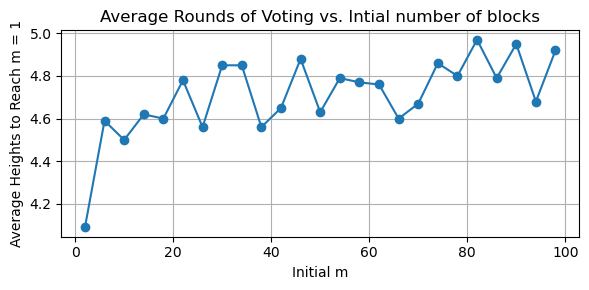

In [136]:

def plot_results(block_range, results):
    plt.figure(figsize=(6, 3))
    plt.plot(list(block_range), results, marker='o')
    plt.xlabel('Initial m')
    plt.ylabel('Average Heights to Reach m = 1')
    plt.title('Average Rounds of Voting vs. Intial number of blocks')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("avn.pdf")
    plt.show()
plot_results(block_range, results)

In [8]:
import random
# Parameters
N = 100  # Total number of nodes
f = 33   # Number of faulty nodes
num_blocks = 2  # Number of block candidates (m)
heights = 100  # Number of heights to simulate
assert N == 3 * f + 1
# Initialize structures to hold vote data and observed votes
votes_at_height = [[[] for _ in range(N)] for _ in range(heights)]
observed_votes = [[set() for _ in range(N)] for _ in range(heights)]
current_votes = [[[] for _ in range(N)] for _ in range(heights)]
#current_votes [0] =[random.randint(1, num_blocks) for _ in range(N)] # Initial votes, randomly distributed 
current_votes [0] = [i % num_blocks + 1 for i in range(N)]  # Initial votes, evenly distributed
def update_observed_indices(node, height, visible_indices):
    """Updates the record of seen votes at a particular height."""
    if height==-1:
        return 
    observed_votes[height][node]=observed_votes[height][node].union(visible_indices)
    for i in visible_indices:
        update_observed_indices(node, height-1, observed_votes[height-1][i])
def calculate_VC_i(height):
    """Calculate the Vote Counter for each node at a given height."""
    VC = [{block: 0 for block in range(1, num_blocks + 1)} for _ in range(N)]
    for node in range(N):
        for h in range(height+1):
            for vote in votes_at_height[h][node]:
                VC[node][vote] += 1
    return VC
def simulate_voting_round(height):
    """Simulate a voting round where each node updates its vote based on observed and potentially supported votes."""
    global current_votes
    new_votes = []
    for node in range(N):
        visible_indices = random.sample(range(N), N - f)
        update_observed_indices(node, height, visible_indices)
        height_=height
        while height_>=0:
            votes_at_height[height_][node]  = [current_votes[height_][i] for i in observed_votes[height_][node]]
            height_-=1
        VC = calculate_VC_i(height)
        vote_counts = {block: VC[node][block] for block in range(1, num_blocks + 1)}
        max_support = max(vote_counts.values())
        candidates = [block for block, count in vote_counts.items() if count == max_support]
        chosen_block = random.choice(candidates)
        new_votes.append(chosen_block)
    current_votes[height+1] = new_votes
def alignment_reached(h):
    """Check if all nodes have the same vote."""
    return len(set(current_votes[h+1])) == 1
# Main simulation loop
print(f"Height {1}: Votes -> {current_votes[0]}")
for height in range(heights):
    simulate_voting_round(height)
    print(f"Height {height+2}: Votes -> {current_votes[height+1]}")
    if alignment_reached(height):
        print(f"Convergence reached at height {height+2}.")
        break

Height 1: Votes -> [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]
Height 2: Votes -> [2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1]
Height 3: Votes -> [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Height 4: Votes -> [2, 2, 2, 2, 2, 2, 2,